In [60]:

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import cv2
DATADIR = "D:/archives/images/Images/"

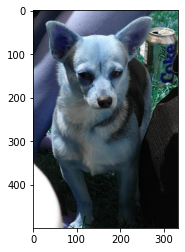

In [61]:
CATEGORIES=['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_terrier', 'n02095314-wire-haired_fox_terrier', 'n02095570-Lakeland_terrier', 'n02095889-Sealyham_terrier', 'n02096051-Airedale', 'n02096177-cairn', 'n02096294-Australian_terrier', 'n02096437-Dandie_Dinmont', 'n02096585-Boston_bull', 'n02097047-miniature_schnauzer', 'n02097130-giant_schnauzer', 'n02097209-standard_schnauzer', 'n02097298-Scotch_terrier', 'n02097474-Tibetan_terrier', 'n02097658-silky_terrier', 'n02098105-soft-coated_wheaten_terrier', 'n02098286-West_Highland_white_terrier', 'n02098413-Lhasa', 'n02099267-flat-coated_retriever', 'n02099429-curly-coated_retriever', 'n02099601-golden_retriever', 'n02099712-Labrador_retriever', 'n02099849-Chesapeake_Bay_retriever', 'n02100236-German_short-haired_pointer', 'n02100583-vizsla', 'n02100735-English_setter', 'n02100877-Irish_setter', 'n02101006-Gordon_setter', 'n02101388-Brittany_spaniel', 'n02101556-clumber', 'n02102040-English_springer', 'n02102177-Welsh_springer_spaniel', 'n02102318-cocker_spaniel', 'n02102480-Sussex_spaniel', 'n02102973-Irish_water_spaniel', 'n02104029-kuvasz', 'n02104365-schipperke', 'n02105056-groenendael', 'n02105162-malinois', 'n02105251-briard', 'n02105412-kelpie', 'n02105505-komondor', 'n02105641-Old_English_sheepdog', 'n02105855-Shetland_sheepdog', 'n02106030-collie', 'n02106166-Border_collie', 'n02106382-Bouvier_des_Flandres', 'n02106550-Rottweiler', 'n02106662-German_shepherd', 'n02107142-Doberman', 'n02107312-miniature_pinscher', 'n02107574-Greater_Swiss_Mountain_dog', 'n02107683-Bernese_mountain_dog', 'n02107908-Appenzeller', 'n02108000-EntleBucher', 'n02108089-boxer', 'n02108422-bull_mastiff', 'n02108551-Tibetan_mastiff', 'n02108915-French_bulldog', 'n02109047-Great_Dane', 'n02109525-Saint_Bernard', 'n02109961-Eskimo_dog', 'n02110063-malamute', 'n02110185-Siberian_husky', 'n02110627-affenpinscher', 'n02110806-basenji', 'n02110958-pug', 'n02111129-Leonberg', 'n02111277-Newfoundland', 'n02111500-Great_Pyrenees', 'n02111889-Samoyed', 'n02112018-Pomeranian', 'n02112137-chow', 'n02112350-keeshond', 'n02112706-Brabancon_griffon', 'n02113023-Pembroke', 'n02113186-Cardigan', 'n02113624-toy_poodle', 'n02113712-miniature_poodle', 'n02113799-standard_poodle', 'n02113978-Mexican_hairless', 'n02115641-dingo', 'n02115913-dhole', 'n02116738-African_hunting_dog']
for category in CATEGORIES: 
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img) )  
        plt.imshow(img_array) 
        plt.show()  # display!

        break 
    break 

In [65]:
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATADIR,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
label_mode='categorical')

Found 20580 files belonging to 120 classes.
Using 16464 files for training.


In [66]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATADIR,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
label_mode='categorical')

Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


In [67]:
class_names = train_ds.class_names
print(class_names)

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

In [69]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=120,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(120, activation='softmax'))

In [70]:

resnet_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_18 (ModuleWr  (None, 2048)             0         
 apper)                                                          
                                                                 
 module_wrapper_19 (ModuleWr  (None, 512)              1049088   
 apper)                                                          
                                                                 
 module_wrapper_20 (ModuleWr  (None, 120)              61560     
 apper)                                                          
                                                                 
Total params: 24,698,360
Trainable params: 1,110,648
Non-trainable params: 23,587,712
__________________________________

In [72]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy',keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])

epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
515/515 [==============================] - 781s 2s/step - loss: 1.3916 - accuracy: 0.5988 - precision: 0.7593 - recall: 0.4722 - val_loss: 1.4431 - val_accuracy: 0.5807 - val_precision: 0.7330 - val_recall: 0.4750
Epoch 2/10
515/515 [==============================] - 803s 2s/step - loss: 0.9940 - accuracy: 0.6997 - precision: 0.8153 - recall: 0.6030 - val_loss: 1.4346 - val_accuracy: 0.6003 - val_precision: 0.7278 - val_recall: 0.5216
Epoch 3/10
515/515 [==============================] - 796s 2s/step - loss: 0.7351 - accuracy: 0.7711 - precision: 0.8587 - recall: 0.6931 - val_loss: 1.4555 - val_accuracy: 0.6088 - val_precision: 0.7228 - val_recall: 0.5442
Epoch 4/10
515/515 [==============================] - 798s 2s/step - loss: 0.5544 - accuracy: 0.8268 - precision: 0.8906 - recall: 0.7683 - val_loss: 1.5416 - val_accuracy: 0.5994 - val_precision: 0.6864 - val_recall: 0.5457
Epoch 5/10
515/515 [==============================] - 795s 2s/step - loss: 0.4060 - accuracy: 0.8758

In [74]:
train_acc = resnet_model.evaluate(train_ds, verbose=0)
test_acc = resnet_model.evaluate(val_ds, verbose=0)

In [75]:
train_acc

[0.20700755715370178,
 0.9314869046211243,
 0.9458479285240173,
 0.9187317490577698]

In [76]:
test_acc

[2.0474507808685303, 0.602283775806427, 0.6463713049888611, 0.5777453780174255]

In [98]:
f1_score2=test_acc[2]*test_acc[3]/(test_acc[2]+test_acc[3])
precision2=test_acc[2]
recall2=test_acc[3]

In [99]:
import pickle
with open("PES1UG20CS142_history_Pretrained.pkl", "wb") as f:
    pickle.dump(history.history,f)

In [78]:
img_height,img_width=224,224
batch_size=32
train_ds1 = tf.keras.preprocessing.image_dataset_from_directory(
  DATADIR,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
label_mode='categorical')

Found 20580 files belonging to 120 classes.
Using 16464 files for training.


In [83]:
val_ds1 = tf.keras.preprocessing.image_dataset_from_directory(
  DATADIR,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
label_mode='categorical')

Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


In [84]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow_hub as hub

In [88]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten()) 
model.add(Dense(256,activation ='relu'))

model.add(Dense(120,activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation_6 (Activation)   (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_7 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                 

In [89]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy',keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])

epochs=10
history = model.fit(
  train_ds1,
  validation_data=val_ds1,
  epochs=epochs)

Epoch 1/10
515/515 [==============================] - 270s 523ms/step - loss: 22.2541 - accuracy: 0.0131 - precision: 0.0102 - recall: 1.8222e-04 - val_loss: 4.7788 - val_accuracy: 0.0124 - val_precision: 0.5000 - val_recall: 2.4295e-04
Epoch 2/10
515/515 [==============================] - 320s 621ms/step - loss: 4.4228 - accuracy: 0.0854 - precision: 0.7130 - recall: 0.0234 - val_loss: 4.9455 - val_accuracy: 0.0175 - val_precision: 0.1375 - val_recall: 0.0027
Epoch 3/10
515/515 [==============================] - 328s 636ms/step - loss: 3.2049 - accuracy: 0.3389 - precision: 0.9276 - recall: 0.2527 - val_loss: 6.1179 - val_accuracy: 0.0187 - val_precision: 0.0495 - val_recall: 0.0056
Epoch 4/10
515/515 [==============================] - 291s 564ms/step - loss: 2.2461 - accuracy: 0.5394 - precision: 0.9547 - recall: 0.4673 - val_loss: 7.5870 - val_accuracy: 0.0187 - val_precision: 0.0396 - val_recall: 0.0078
Epoch 5/10
515/515 [==============================] - 314s 609ms/step - loss: 1

In [90]:

test_acc1 = model.evaluate(val_ds1, verbose=0)

In [91]:
test_acc1

[19.32931137084961,
 0.0225947517901659,
 0.026746507734060287,
 0.016277939081192017]

In [92]:
f1_score=test_acc1[2]*test_acc1[3]/(test_acc1[2]+test_acc1[3])
precision=test_acc1[2]
recall=test_acc1[3]

In [93]:
import pickle
with open("PES1UG20CS142_history_Normal.pkl", "wb") as f:
    pickle.dump(history.history,f)

In [96]:
import pandas as pd
df_cols = ['accuracy', 'precision' , 'recall', 'f1-score', 'model']
new_df = pd.DataFrame(columns=df_cols)


True

In [100]:
row1=[test_acc1[1],test_acc1[2],test_acc1[3],f1_score,'Normal']
row2=[test_acc[1],test_acc[2],test_acc[3],f1_score2,'Pretrained']

In [101]:
new_df.loc[0] = row1
new_df.loc[1] = row2
new_df

,accuracy,precision,recall,f1-score,model
0,0.022595,0.026747,0.016278,0.010119,Normal
1,0.602284,0.646371,0.577745,0.305067,Pretrained


In [103]:
new_df.to_csv('PES1UG20CS142_A1_TDL23')